In [2234]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hitters/Hitters.csv


# 1. Gerekli kütüphanelerin kurulumu ve Veri setini anlama

In [2235]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Veri setini okuma
hitters_data = pd.read_csv("/kaggle/input/hitters/Hitters.csv")
df = hitters_data.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [2236]:
#Kısa bilgiler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.0,380.928571,153.404981,16.0,255.25,379.5,512.00,687.0
Hits,322.0,101.024845,46.454741,1.0,64.00,96.0,137.00,238.0
HmRun,322.0,10.770186,8.709037,0.0,4.00,8.0,16.00,40.0
Runs,322.0,50.909938,26.024095,0.0,30.25,48.0,69.00,130.0
RBI,322.0,48.027950,26.166895,0.0,28.00,44.0,64.75,121.0
Walks,322.0,38.742236,21.639327,0.0,22.00,35.0,53.00,105.0
Years,322.0,7.444099,4.926087,1.0,4.00,6.0,11.00,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,816.75,1928.0,3924.25,14053.0
CHits,322.0,717.571429,654.472627,4.0,209.00,508.0,1059.25,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,14.00,37.5,90.00,548.0


In [2237]:
#Veri boyutu
df.shape

(322, 20)

In [2238]:
#Kaç eksik değer var?
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [2239]:
#Eksik verilere bakış
df[df["Salary"].isnull()].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A


# 2. Eksik verileri silerek ve herhangi başka bir analiz yapmadan alınacak sonuçlar

## 2.1.1 Tüm veri seti ile basit doğrusal regresyon

In [2240]:
#Eksik verileri siliyoruz.
df.dropna(inplace = True)
df.shape

(263, 20)

In [2241]:
#Veri setinde sadece CHits değişkenini kullanmak için seçiyoruz.
X = df[["CHits"]]
y = df[["Salary"]]
X = scaler.fit_transform(X)
reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression()

In [2242]:
print("Formula: "+str(reg_model.intercept_)+" "+str(reg_model.coef_)+"x1")

Formula: [535.92588213] [[247.15214091]]x1


In [2243]:
y_pred = reg_model.predict(X)

In [2244]:
from sklearn.metrics import mean_squared_error
sonuc_tum_veri_slr = np.sqrt(mean_squared_error(y, y_pred))
sonuc_tum_veri_slr

376.3643027728653

In [2245]:
sonuc_tum_veri_cv_slr = np.sqrt(np.mean(-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tum_veri_cv_slr

383.4526516640398

## 2.1.2 Train ve test olarak ayırarak alınan basit doğrusal regresyon

In [2246]:
X = df[["CHits"]]
y = df[["Salary"]]
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [2247]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [2248]:
print("Formula: "+str(reg_model.intercept_)+" "+str(reg_model.coef_)+"x1")

Formula: [537.78313303] [[270.03230409]]x1


In [2249]:
y_pred = reg_model.predict(X_train)

In [2250]:
sonuc_train_veri_slr = np.sqrt(mean_squared_error(y_train, y_pred))
sonuc_train_veri_slr

348.96784372179457

In [2251]:
y_pred = reg_model.predict(X_test)

In [2252]:
sonuc_test_veri_slr = np.sqrt(mean_squared_error(y_test, y_pred))
sonuc_test_veri_slr

472.230050228946

In [2253]:
sonuc_tt_veri_cv_slr = np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tt_veri_cv_slr

352.69590920059227

# 2.2.1 Tüm veri seti ile çoklu doğrusal regresyon

In [2254]:
#Kategorik değişkenleri 1-0 şeklinde ifade ederiz
df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)

In [2255]:
y = df["Salary"]
X = df.drop('Salary', axis=1)
X = scaler.fit_transform(X)

In [2256]:
reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression()

In [2257]:
print(reg_model.intercept_)

535.9258821292775


In [2258]:
print(reg_model.coef_)

[-291.0945557   337.83047948   37.85383676  -60.57247861  -26.99498379
  135.07389695  -16.69335888 -391.03865466   86.68761664  -14.18172332
  480.74713477  260.68988581 -213.89225864   78.76129639   53.73248973
  -22.16086217   31.2487626   -58.41406355  -12.34881102]


In [2259]:
y_pred = reg_model.predict(X)

In [2260]:
sonuc_tum_veri_clr = np.sqrt(mean_squared_error(y, y_pred))
sonuc_tum_veri_clr

303.34447253531613

In [2261]:
sonuc_tum_veri_cv_clr = np.sqrt(np.mean(-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tum_veri_cv_clr

341.46597732981036

## 2.2.2 Train ve test olarak ayrılan coklu dogrusal regresyon

In [2262]:
y = df["Salary"]
X = df.drop('Salary', axis=1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [2263]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [2264]:
print(reg_model.intercept_)

534.5934048105765


In [2265]:
print(reg_model.coef_)

[-1.81989481e+02  2.33568966e+02  5.25917808e+01  2.07325675e+01
 -3.46308954e+01  4.81565534e+01 -1.14645801e-01 -9.31358594e+02
  1.11333493e+03  1.98450308e+02  1.27811909e+02 -2.35205399e+02
 -1.84619883e+01  9.16202977e+01  2.31451518e+01 -4.36054446e+00
  3.69787336e+01 -2.73605842e+01 -2.69655270e+01]


In [2266]:
y_pred = reg_model.predict(X_train)

In [2267]:
sonuc_train_veri_clr = np.sqrt(mean_squared_error(y_train, y_pred))
sonuc_train_veri_clr

261.36151857439336

In [2268]:
y_pred = reg_model.predict(X_test)

In [2269]:
sonuc_test_veri_clr = np.sqrt(mean_squared_error(y_test, y_pred))
sonuc_test_veri_clr

479.07150373702115

In [2270]:
sonuc_tt_veri_cv_clr = np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tt_veri_cv_clr

307.225760590695

## 2.3.1 Tüm veri ile Ridge Regresyon

In [2271]:
y = df["Salary"]
X = df.drop('Salary', axis=1)
X = scaler.fit_transform(X)

In [2272]:
reg_model = Ridge()
reg_model.fit(X, y)

Ridge()

In [2273]:
print(reg_model.intercept_)

535.9258821292775


In [2274]:
print(reg_model.coef_)

[-270.47549797  296.56190392   18.1638957   -29.40456794   -9.21637609
  124.44029854  -38.69207918 -225.35662735  126.90023608   39.08043983
  320.21040942  160.36986132 -184.49438733   78.60950469   47.44645692
  -23.76376773   31.01887447  -60.24628766  -13.67402282]


In [2275]:
y_pred = reg_model.predict(X)

In [2276]:
sonuc_tum_veri_ridge = np.sqrt(mean_squared_error(y, y_pred))
sonuc_tum_veri_ridge

304.1140381775486

In [2277]:
sonuc_tum_veri_cv_ridge = np.sqrt(np.mean(-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tum_veri_cv_ridge

338.45318355057594

## 2.3.2 Train ve test ayırarak Ridge Regresyon

In [2278]:
y = df["Salary"]
X = df.drop('Salary', axis=1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [2279]:
reg_model = Ridge()
reg_model.fit(X_train, y_train)

Ridge()

In [2280]:
print(reg_model.intercept_)

534.3842751448135


In [2281]:
print(reg_model.coef_)

[-2.12250580e+02  2.94521009e+02  5.61152622e+01 -2.55351846e+00
 -4.37183213e+01  6.01153833e+01 -3.86917951e+01 -2.61823619e+02
  2.83960961e+02  7.01505168e+01  2.64726580e+02 -1.60888933e+01
 -8.13605795e+01  9.06581582e+01  8.41866713e+00  6.12518006e-02
  3.19909624e+01 -3.13095890e+01 -2.03624248e+01]


In [2282]:
y_pred = reg_model.predict(X_train)

In [2283]:
sonuc_train_veri_ridge = np.sqrt(mean_squared_error(y_train, y_pred))
sonuc_train_veri_ridge

264.57675950942337

In [2284]:
y_pred = reg_model.predict(X_test)

In [2285]:
sonuc_test_veri_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
sonuc_test_veri_ridge

458.75144252220116

In [2286]:
sonuc_tt_veri_cv_ridge = np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tt_veri_cv_ridge

301.30845041111684

## 2.4.1 Tüm veri seti ile Lasso Regresyon

In [2287]:
y = df["Salary"]
X = df.drop('Salary', axis=1)
X = scaler.fit_transform(X)

In [2288]:
reg_model =Lasso()
reg_model.fit(X, y)

Lasso()

In [2289]:
print(reg_model.intercept_)

535.9258821292775


In [2290]:
print(reg_model.coef_)

[-281.1172681   303.71277457   11.13050868  -25.23750713   -0.
  120.83597005  -35.04328737 -161.32198712    0.           14.27182293
  375.15175777  192.2154112  -190.2391271    78.6764498    41.88526703
  -18.83445093   23.20900807  -58.23442843   -4.94183895]


In [2291]:
y_pred = reg_model.predict(X)

In [2292]:
sonuc_tum_veri_lasso = np.sqrt(mean_squared_error(y, y_pred))
sonuc_tum_veri_lasso

304.3172941943879

In [2293]:
sonuc_tum_veri_cv_lasso = np.sqrt(np.mean(-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tum_veri_cv_lasso

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9820.372265029699, tolerance: 4637.712860074582
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16226.579207986593, tolerance: 4976.191260952606
  positive)


338.62654726299627

## 2.4.2 Train ve test ayırarak Lasso Regresyon

In [2294]:
y = df["Salary"]
X = df.drop('Salary', axis=1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [2295]:
reg_model =Lasso()
reg_model.fit(X_train, y_train)

Lasso()

In [2296]:
print(reg_model.intercept_)

534.1205196004398


In [2297]:
print(reg_model.coef_)

[-196.30842607  276.77508177   51.8781116     0.          -34.54898782
   51.79290628  -24.37765742 -423.94957962  402.3140429    58.93022571
  269.48957057   -0.          -57.578216     89.43835188    8.90737726
    0.           25.73766269  -28.96185078  -14.25654751]


In [2298]:
y_pred = reg_model.predict(X_train)

In [2299]:
sonuc_train_veri_lasso = np.sqrt(mean_squared_error(y_train, y_pred))
sonuc_train_veri_lasso

263.7056447668435

In [2300]:
y_pred = reg_model.predict(X_test)

In [2301]:
sonuc_test_veri_lasso = np.sqrt(mean_squared_error(y_test, y_pred))
sonuc_test_veri_lasso

461.2422858691614

In [2302]:
sonuc_tt_veri_cv_lasso = np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tt_veri_cv_lasso

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16513.212395645678, tolerance: 3651.8483906293914
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7964.692977316678, tolerance: 3684.426158113166
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4623.670405648649, tolerance: 3724.140602819258
  positive)


301.1205249294909

## 2.5.1 Tüm veri seti ile ElasticNet Regresyon

In [2303]:
y = df["Salary"]
X = df.drop('Salary', axis=1)
X = scaler.fit_transform(X)

In [2304]:
reg_model =ElasticNet()
reg_model.fit(X, y)

ElasticNet()

In [2305]:
print(reg_model.intercept_)

535.9258821292775


In [2306]:
print(reg_model.coef_)

[  5.76548475  44.32773203   1.63340483  28.13065891  22.59245714
  38.47123143   1.55719543  25.61720464  41.11724494  36.25263909
  41.71364158  43.50751186   8.82399977  52.26616588   5.18046378
 -10.83125396  12.90217625 -44.6639689    3.56603582]


In [2307]:
y_pred = reg_model.predict(X)

In [2308]:
sonuc_tum_veri_enet = np.sqrt(mean_squared_error(y, y_pred))
sonuc_tum_veri_enet

326.5621957219224

In [2309]:
sonuc_tum_veri_cv_enet = np.sqrt(np.mean(-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tum_veri_cv_enet

343.0594626712361

## 2.5.2 Train ve test ayırarak ElasticNet Regresyon

In [2310]:
y = df["Salary"]
X = df.drop('Salary', axis=1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [2311]:
reg_model =ElasticNet()
reg_model.fit(X_train, y_train)

ElasticNet()

In [2312]:
print(reg_model.intercept_)

532.598622403121


In [2313]:
print(reg_model.coef_)

[ 15.98081773  51.74110102  16.66354522  37.74294628  17.59195988
  24.72879384   3.31024486  28.15263103  43.92408862  28.65612752
  45.28632057  34.09192393  16.7331638   61.40582858  -7.70403344
  -1.29334611  12.12353304 -28.22986528   0.75801616]


In [2314]:
y_pred = reg_model.predict(X_train)

In [2315]:
sonuc_train_veri_enet = np.sqrt(mean_squared_error(y_train, y_pred))
sonuc_train_veri_enet

285.63335637134685

In [2316]:
y_pred = reg_model.predict(X_test)

In [2317]:
sonuc_test_veri_enet = np.sqrt(mean_squared_error(y_test, y_pred))
sonuc_test_veri_enet

463.93529372031867

In [2318]:
sonuc_tt_veri_cv_enet = np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tt_veri_cv_enet

299.84842837413936

In [2319]:
#İlk sonuçların çıktısı
basicsonuc_df = pd.DataFrame({"All Data Error":[sonuc_tum_veri_slr,sonuc_tum_veri_clr,sonuc_tum_veri_ridge,sonuc_tum_veri_lasso,sonuc_tum_veri_enet],
                              "All Data cvScore(K-Fold)":[sonuc_tum_veri_cv_slr,sonuc_tum_veri_cv_clr,sonuc_tum_veri_cv_ridge,sonuc_tum_veri_cv_lasso,sonuc_tum_veri_cv_enet],
                              "Train Error":[sonuc_train_veri_slr,sonuc_train_veri_clr,sonuc_train_veri_ridge,sonuc_train_veri_lasso,sonuc_train_veri_enet],
                              "Test Error":[sonuc_test_veri_slr,sonuc_test_veri_clr,sonuc_test_veri_ridge,sonuc_test_veri_lasso,sonuc_test_veri_enet],                
                              "Train cvScore(K-Fold)":[sonuc_tt_veri_cv_slr,sonuc_tt_veri_cv_clr,sonuc_tt_veri_cv_ridge,sonuc_tt_veri_cv_lasso,sonuc_tt_veri_cv_enet]})
basicsonuc_df.index= ["SLR", "CLR","RID","LAS","ENE"]
basicsonuc_df

,All Data Error,All Data cvScore(K-Fold),Train Error,Test Error,Train cvScore(K-Fold)
SLR,376.364303,383.452652,348.967844,472.230050,352.695909
CLR,303.344473,341.465977,261.361519,479.071504,307.225761
RID,304.114038,338.453184,264.576760,458.751443,301.308450
LAS,304.317294,338.626547,263.705645,461.242286,301.120525
ENE,326.562196,343.059463,285.633356,463.935294,299.848428


# 3. Veri Ön işleme adımları(Eksik veri, aykırı veri analizleri)

In [2320]:
df = hitters_data.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [2321]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931


In [2322]:
df[["CHits","Salary"]].describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
CHits,322.0,717.571429,654.472627,4.0,9.84,54.0,86.0,209.0,508.0,1059.25,1659.6000,2017.15,2500.34000,4256.0
Salary,263.0,535.925882,451.118681,67.5,70.00,86.6,100.0,190.0,425.0,750.00,1048.6666,1346.00,2032.88654,2460.0


In [2323]:
# Deişkenleri 4 parçaya bölme
df["ChitsScore"] = pd.qcut(df['CHits'], 4, labels = [1,2,3,4])
df["SalaryScore"] = pd.qcut(df['Salary'], 4, labels = [1,2,3,4])
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,ChitsScore,SalaryScore
0,293,66,1,30,29,14,1,293,66,1,...,14,A,E,446,33,20,NaN,A,1,NaN
1,315,81,7,24,38,39,14,3449,835,69,...,375,N,W,632,43,10,475.0,N,3,3
2,479,130,18,66,72,76,3,1624,457,63,...,263,A,W,880,82,14,480.0,A,2,3
3,496,141,20,65,78,37,11,5628,1575,225,...,354,N,E,200,11,3,500.0,N,4,3
4,321,87,10,39,42,30,2,396,101,12,...,33,N,E,805,40,4,91.5,N,1,1


In [2324]:
#Bölünen 4 parçada birbiriyle eşit olan parçaların medianını eksik değere atama
for i in df[df["Salary"].isnull()].index:
    if df.loc[i,"ChitsScore"] == 1:
        df.loc[i,"Salary"] = df[df["ChitsScore"]==1]["Salary"].median()
    elif df.loc[i,"ChitsScore"] == 2:
        df.loc[i,"Salary"] = df[df["ChitsScore"]==2]["Salary"].median()
    elif df.loc[i,"ChitsScore"] == 3:
        df.loc[i,"Salary"] = df[df["ChitsScore"]==3]["Salary"].median()
    else:
        df.loc[i,"Salary"] = df[df["ChitsScore"]==4]["Salary"].median()

In [2325]:
df.isnull().sum()

AtBat           0
Hits            0
HmRun           0
Runs            0
RBI             0
Walks           0
Years           0
CAtBat          0
CHits           0
CHmRun          0
CRuns           0
CRBI            0
CWalks          0
League          0
Division        0
PutOuts         0
Assists         0
Errors          0
Salary          0
NewLeague       0
ChitsScore      0
SalaryScore    59
dtype: int64

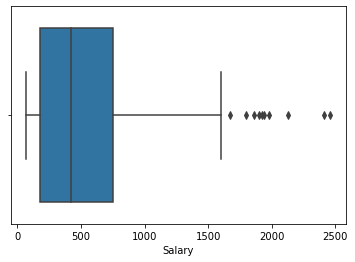

In [2326]:
df_salary = df["Salary"]
df_salary.head()
sns.boxplot(x = df_salary);

In [2327]:
Q1 = df_salary.quantile(0.25)
Q1

176.25

In [2328]:
Q3 = df_salary.quantile(0.75)
Q3

750.0

In [2329]:
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(str(lower)+" "+str(upper))

-684.375 1610.625


In [2330]:
df_salary[(df_salary > upper) | (df_salary < lower)]

82     1975.000
84     1900.000
96     1861.460
100    2460.000
112    1925.571
163    2412.500
179    1800.000
217    2127.333
229    1940.000
248    1670.000
Name: Salary, dtype: float64

In [2331]:
df.loc[df["Salary"] > upper,"Salary"] = upper

In [2332]:
df = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'], drop_first = True)

In [2333]:
df.shape

(322, 22)

In [2334]:
#Yeni değişkenler oluşturuyoruz
catbat=df["CAtBat"]/df["Years"]
chits=df["CHits"]/df["Years"]
chmrun=df["CHmRun"]/df["Years"]
cruns=df["CRuns"]/df["Years"]
crbi=df["CRBI"]/df["Years"]
cwalks=df["CWalks"]/df["Years"]
df_seckin = pd.DataFrame({"ortAtBat":catbat,"ortHits":chits,"ortHmRun":chmrun,"ortRuns":cruns,"ortRBI":crbi,"ortWalks":cwalks})
df = pd.concat([df, df_seckin], axis=1)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,SalaryScore,League_N,Division_W,NewLeague_N,ortAtBat,ortHits,ortHmRun,ortRuns,ortRBI,ortWalks
0,293,66,1,30,29,14,1,293,66,1,...,NaN,0,0,0,293.000000,66.000000,1.000000,30.000000,29.000000,14.000000
1,315,81,7,24,38,39,14,3449,835,69,...,3,1,1,1,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,479,130,18,66,72,76,3,1624,457,63,...,3,0,1,0,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,496,141,20,65,78,37,11,5628,1575,225,...,3,1,0,1,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,321,87,10,39,42,30,2,396,101,12,...,1,1,0,1,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000


In [2335]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Salary,League_N,Division_W,NewLeague_N,ortAtBat,ortHits,ortHmRun,ortRuns,ortRBI,ortWalks
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,...,0.435226,-0.101663,-0.045441,-0.057655,0.682601,0.686120,0.449912,0.675838,0.605747,0.447566
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,...,0.465987,-0.101038,-0.071143,-0.060608,0.669229,0.703749,0.414794,0.675328,0.598846,0.429144
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,...,0.360682,-0.177258,-0.017206,-0.166044,0.417737,0.411294,0.816323,0.466523,0.673801,0.371388
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,...,0.445570,-0.150392,-0.076311,-0.115446,0.633326,0.649075,0.477686,0.708969,0.580733,0.515092
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,...,0.467972,-0.145597,-0.075531,-0.120124,0.578336,0.589899,0.703965,0.583649,0.750534,0.432697
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,...,0.469009,-0.045337,-0.059086,-0.020029,0.521255,0.517367,0.454593,0.594891,0.535173,0.762129
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,...,0.477781,-0.047261,0.021126,-0.042919,0.367124,0.382881,0.264486,0.339320,0.398562,0.363858
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,...,0.589445,-0.028738,0.022965,-0.016502,0.621840,0.634487,0.416974,0.592377,0.610182,0.546807
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,...,0.607273,-0.025790,0.013584,-0.010047,0.629950,0.655927,0.412098,0.608389,0.618941,0.540880
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,...,0.525003,-0.098383,0.006783,-0.097461,0.486955,0.484482,0.731355,0.508524,0.710430,0.521286


# 4. Veri ön işleme yapıldıktan sonra alınan sonuçlar

## 4.1.1 Tüm veri ile basit doğrusal regresyon

In [2336]:
from sklearn.linear_model import LinearRegression
X = df[["ortHits"]]
y = df[["Salary"]]
X = scaler.fit_transform(X)
reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression()

In [2337]:
print("Formula: "+str(reg_model.intercept_)+" "+str(reg_model.coef_)+"x1")

Formula: [508.09903882] [[236.21223579]]x1


In [2338]:
y_pred = reg_model.predict(X)

In [2339]:
from sklearn.metrics import mean_squared_error
sonuc_tum_veri_detay_slr = np.sqrt(mean_squared_error(y, y_pred))
sonuc_tum_veri_detay_slr

303.17626852607276

In [2340]:
sonuc_tum_veri_cv_detay_slr = np.sqrt(np.mean(-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tum_veri_cv_detay_slr

306.9195691112033

## 4.1.2 Train ve test ayırarak basit doğrusal regresyon

In [2341]:
X = df[["ortHits"]]
y = df[["Salary"]]
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [2342]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [2343]:
print("Formula: "+str(reg_model.intercept_)+" "+str(reg_model.coef_)+"x1")

Formula: [501.62746841] [[230.22684831]]x1


In [2344]:
y_pred = reg_model.predict(X_train)

In [2345]:
sonuc_train_veri_detay_slr = np.sqrt(mean_squared_error(y_train, y_pred))
sonuc_train_veri_detay_slr

309.94883961016205

In [2346]:
y_pred = reg_model.predict(X_test)

In [2347]:
sonuc_test_veri_detay_slr = np.sqrt(mean_squared_error(y_test, y_pred))
sonuc_test_veri_detay_slr

275.4681670446134

In [2348]:
sonuc_tt_veri_cv_detay_slr = np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tt_veri_cv_detay_slr

312.7246479727286

## 4.2.1 Tüm veri ile çoklu doğrusal regresyon

In [2349]:
#Geri kalan tüm modellemelerde bu X, y, X_train ve y_train i  kullanacağız.
y = df["Salary"]
X = concatenated_dataframes.drop(['Salary',"SalaryScore","ChitsScore","Assists","Errors","CAtBat","CHits","CHmRun","CRuns","CRBI","CWalks","League_N","NewLeague_N"], axis=1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

In [2350]:
reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression()

In [2351]:
reg_model.intercept_

508.09903881987594

In [2352]:
reg_model.coef_

array([ -18.78187555,   28.05635187,   18.56949732,  -18.35152533,
        -34.47584785,   99.24555048,  112.9523717 ,   42.19076057,
        -38.56328513, -400.29956824,  370.17962105,  -34.46066441,
        129.92302147,  128.11627131,  -55.15713266])

In [2353]:
y_pred = reg_model.predict(X)

In [2354]:
sonuc_tum_veri_detay_clr = np.sqrt(mean_squared_error(y, y_pred))
sonuc_tum_veri_detay_clr

254.02347315813782

In [2355]:
sonuc_tum_veri_cv_detay_clr = np.sqrt(np.mean(-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tum_veri_cv_detay_clr

271.7826736061795

## 4.2.2 Train ve test ayırarak çoklu doğrusal regresyon

In [2356]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [2357]:
reg_model.intercept_

509.6605931396445

In [2358]:
reg_model.coef_

array([ -16.80019679,    8.41271656,    2.39143399,  -29.45060986,
        -25.16363337,  118.11347023,  125.08843385,   43.93104309,
        -44.97757109, -414.73582946,  357.80841185,  -46.41131294,
        173.34260612,  150.59787683,  -84.74533337])

In [2359]:
y_pred = reg_model.predict(X_train)

In [2360]:
sonuc_train_veri_detay_clr = np.sqrt(mean_squared_error(y_train, y_pred))
sonuc_train_veri_detay_clr

255.9966129072163

In [2361]:
y_pred = reg_model.predict(X_test)

In [2362]:
sonuc_test_veri_detay_clr = np.sqrt(mean_squared_error(y_test, y_pred))
sonuc_test_veri_detay_clr

251.4699992494551

In [2363]:
sonuc_tt_veri_cv_detay_clr = np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tt_veri_cv_detay_clr

274.42826846938954

## 4.3.1 Tüm veri ile Ridge Regresyon

In [2364]:
reg_model = Ridge()
reg_model.fit(X, y)

Ridge()

In [2365]:
reg_model.intercept_

508.09903881987594

In [2366]:
reg_model.coef_

array([ -59.12408831,   71.99455624,   16.64054185,  -20.40393139,
        -31.80524931,  100.67118127,  116.02797524,   44.37908867,
        -39.1560722 , -300.76424018,  265.7412328 ,  -34.74534313,
        135.02571141,  127.16936034,  -59.70127583])

In [2367]:
y_pred = reg_model.predict(X)

In [2368]:
sonuc_tum_veri_detay_ridge = np.sqrt(mean_squared_error(y, y_pred))
sonuc_tum_veri_detay_ridge

254.33348691822073

In [2369]:
sonuc_tum_veri_cv_detay_ridge = np.sqrt(np.mean(-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tum_veri_cv_detay_ridge

271.061716245903

## 4.3.2 Train ve test ayırarak Ridge Regresyon

In [2370]:
reg_model = Ridge()
reg_model.fit(X_train, y_train)

Ridge()

In [2371]:
reg_model.intercept_

509.4413320301749

In [2372]:
reg_model.coef_

array([ -64.41385392,   58.99433944,   -3.57507804,  -26.57489672,
        -19.1360011 ,  115.01216715,  128.85073223,   46.51916211,
        -45.42447704, -297.54584016,  249.41748268,  -35.87218879,
        163.52143755,  135.35480725,  -82.14882535])

In [2373]:
y_pred = reg_model.predict(X_train)

In [2374]:
sonuc_train_veri_detay_ridge = np.sqrt(mean_squared_error(y_train, y_pred))
sonuc_train_veri_detay_ridge

256.4523112383532

In [2375]:
y_pred = reg_model.predict(X_test)

In [2376]:
sonuc_test_veri_detay_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
sonuc_test_veri_detay_ridge

250.24453184841724

In [2377]:
sonuc_tt_veri_cv_detay_ridge = np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tt_veri_cv_detay_ridge

272.7165814436063

## 4.4.1 Tüm veri ile Lasso Regresyon

In [2378]:
reg_model = Lasso()
reg_model.fit(X, y)

Lasso()

In [2379]:
reg_model.intercept_

508.0990388198759

In [2380]:
reg_model.coef_

array([  -6.55983273,    0.74227425,   -0.        ,    0.        ,
         -4.63401781,   80.83827572,  113.70940675,   42.8272981 ,
        -38.60043655, -353.19504022,  379.22064429,   -0.        ,
         82.72743127,   69.38448835,  -31.32560711])

In [2381]:
y_pred = reg_model.predict(X)

In [2382]:
sonuc_tum_veri_detay_lasso = np.sqrt(mean_squared_error(y, y_pred))
sonuc_tum_veri_detay_lasso

254.51053992151796

In [2383]:
sonuc_tum_veri_cv_detay_lasso = np.sqrt(np.mean(-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tum_veri_cv_detay_lasso

269.6181876059747

## 4.4.2 Train ve test ayırarak Lasso Regresyon

In [2384]:
reg_model = Lasso()
reg_model.fit(X_train, y_train)

Lasso()

In [2385]:
reg_model.intercept_

509.6653180416068

In [2386]:
reg_model.coef_

array([ -22.51321393,    0.        ,  -19.79809736,   -0.        ,
         -0.        ,   95.37595069,  127.60041363,   45.18030762,
        -45.02537827, -345.84924621,  355.07067785,   -0.        ,
        109.94231604,   82.76209055,  -56.22914283])

In [2387]:
y_pred = reg_model.predict(X_train)

In [2388]:
sonuc_train_veri_detay_lasso = np.sqrt(mean_squared_error(y_train, y_pred))
sonuc_train_veri_detay_lasso

256.57771199981516

In [2389]:
y_pred = reg_model.predict(X_test)

In [2390]:
sonuc_test_veri_detay_lasso = np.sqrt(mean_squared_error(y_test, y_pred))
sonuc_test_veri_detay_lasso

248.7365299564664

In [2391]:
sonuc_tt_veri_cv_detay_lasso = np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tt_veri_cv_detay_lasso

271.61619526027886

## 4.5.1 Tüm veri ile ElasticNet Regresyon

In [2392]:
reg_model = ElasticNet()
reg_model.fit(X, y)

ElasticNet()

In [2393]:
reg_model.intercept_

508.09903881987583

In [2394]:
reg_model.coef_

array([ -0.48078134,  21.59844012,  -0.        ,  10.91504259,
        12.04471341,  29.2433437 ,  81.83697466,  33.5167273 ,
       -30.1505499 ,  11.77709024,  40.87335853,  10.61612249,
        32.3775944 ,  35.61369716,  17.75861681])

In [2395]:
y_pred = reg_model.predict(X)

In [2396]:
sonuc_tum_veri_detay_enet = np.sqrt(mean_squared_error(y, y_pred))
sonuc_tum_veri_detay_enet

270.92444413095683

In [2397]:
sonuc_tum_veri_cv_detay_enet = np.sqrt(np.mean(-cross_val_score(reg_model, X, y, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tum_veri_cv_detay_enet

279.2396427843337

## 4.5.2 Train ve test ayırarak ElasticNet Regresyon

In [2398]:
reg_model = ElasticNet()
reg_model.fit(X_train, y_train)

ElasticNet()

In [2399]:
reg_model.intercept_

508.56693462949966

In [2400]:
reg_model.coef_

array([ -1.8761461 ,  20.64973176,  -4.31954769,   8.4049047 ,
        13.10912364,  27.58396235,  88.21781999,  36.07459431,
       -34.55409259,  11.79083217,  41.58417377,   8.93121572,
        32.58814165,  35.64135619,  16.63312294])

In [2401]:
y_pred = reg_model.predict(X_train)

In [2402]:
sonuc_train_veri_detay_enet = np.sqrt(mean_squared_error(y_train, y_pred))
sonuc_train_veri_detay_enet

274.8385083154196

In [2403]:
y_pred = reg_model.predict(X_test)

In [2404]:
sonuc_test_veri_detay_enet = np.sqrt(mean_squared_error(y_test, y_pred))
sonuc_test_veri_detay_enet

249.51420291442443

In [2405]:
sonuc_tt_veri_cv_detay_enet = np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
sonuc_tt_veri_cv_detay_enet

281.4344026797186

In [2406]:
#Detaylı sonuçların çıktısı
detaysonuc_df = pd.DataFrame({"Tüm Veri Score":[sonuc_tum_veri_detay_slr,sonuc_tum_veri_detay_clr,sonuc_tum_veri_detay_ridge,sonuc_tum_veri_detay_lasso,sonuc_tum_veri_detay_enet],
                              "Tüm Veri CVScore":[sonuc_tum_veri_cv_detay_slr,sonuc_tum_veri_cv_detay_clr,sonuc_tum_veri_cv_detay_ridge,sonuc_tum_veri_cv_detay_lasso,sonuc_tum_veri_cv_detay_enet],
                              "Train Veri Sonuc":[sonuc_train_veri_detay_slr,sonuc_train_veri_detay_clr,sonuc_train_veri_detay_ridge,sonuc_train_veri_detay_lasso,sonuc_train_veri_detay_enet],
                              "Test Veri Sonuc":[sonuc_test_veri_detay_slr,sonuc_test_veri_detay_clr,sonuc_test_veri_detay_ridge,sonuc_test_veri_detay_lasso,sonuc_test_veri_detay_enet],                              
                              "TrainTest CVScore":[sonuc_tt_veri_cv_detay_slr,sonuc_tt_veri_cv_detay_clr,sonuc_tt_veri_cv_detay_ridge,sonuc_tt_veri_cv_detay_lasso,sonuc_tt_veri_cv_detay_enet]})
detaysonuc_df.index= ["SLR_DETAY", "CLR_DETAY","RID_DETAY","LAS_DETAY","ENE_DETAY"]
detaysonuc_df

,Tüm Veri Score,Tüm Veri CVScore,Train Veri Sonuc,Test Veri Sonuc,TrainTest CVScore
SLR_DETAY,303.176269,306.919569,309.948840,275.468167,312.724648
CLR_DETAY,254.023473,271.782674,255.996613,251.469999,274.428268
RID_DETAY,254.333487,271.061716,256.452311,250.244532,272.716581
LAS_DETAY,254.510540,269.618188,256.577712,248.736530,271.616195
ENE_DETAY,270.924444,279.239643,274.838508,249.514203,281.434403


## 5. CV işlemleri Ridge, Lasso, Enet

In [2407]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# 5.1 RidgeCV

In [2408]:
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)

In [2409]:
ridge_cv = RidgeCV(alphas = alphas1, scoring = "neg_mean_squared_error", cv = 10, normalize = True)

In [2410]:
ridge_cv.fit(X, y)

RidgeCV(alphas=array([644, 464, 728, 592, 947, 653, 886, 637, 634, 664, 601, 143, 563,
       152, 151, 793, 403, 311, 259, 292, 173, 966, 754, 904, 566, 440,
        99, 232, 670, 917, 917, 777, 368, 439, 559, 377,  73, 215, 398,
       505, 211, 790, 835, 285, 208, 844, 953, 682, 694, 944, 307, 829,
       591, 886, 193, 749, 703, 612, 278, 546, 814, 950, 539, 159, 524,
       518, 343, 151, 855, 147, 443, 841, 283, 329, 794, 524, 762, 850,
       515, 758, 147, 655, 257, 711, 820, 136, 190, 209, 584, 337,  87,
       278, 374, 109, 261, 394, 200, 252, 602, 474]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [2411]:
tum_alpha_ridge1 = ridge_cv.alpha_
tum_alpha_ridge1

73

In [2412]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([644, 464, 728, 592, 947, 653, 886, 637, 634, 664, 601, 143, 563,
       152, 151, 793, 403, 311, 259, 292, 173, 966, 754, 904, 566, 440,
        99, 232, 670, 917, 917, 777, 368, 439, 559, 377,  73, 215, 398,
       505, 211, 790, 835, 285, 208, 844, 953, 682, 694, 944, 307, 829,
       591, 886, 193, 749, 703, 612, 278, 546, 814, 950, 539, 159, 524,
       518, 343, 151, 855, 147, 443, 841, 283, 329, 794, 524, 762, 850,
       515, 758, 147, 655, 257, 711, 820, 136, 190, 209, 584, 337,  87,
       278, 374, 109, 261, 394, 200, 252, 602, 474]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [2413]:
tt_alpha_ridge1 = ridge_cv.alpha_
tt_alpha_ridge1 

73

In [2414]:
ridge_tuned = Ridge(alpha = tum_alpha_ridge1).fit(X, y)
y_pred = ridge_tuned.predict(X)
tum_tuned_ridge1 = np.sqrt(mean_squared_error(y, y_pred))
tum_tuned_ridge1

265.9920893985055

In [2415]:
ridge_tuned = Ridge(alpha = tt_alpha_ridge1 ).fit(X_train, y_train)
y_pred = ridge_tuned.predict(X_test)
tt_tuned_ridge1 = np.sqrt(mean_squared_error(y_test, y_pred))
tt_tuned_ridge1

249.24350845303715

In [2416]:
ridge_cv = RidgeCV(alphas = alphas2, scoring = "neg_mean_squared_error", cv = 10, normalize = True)

In [2417]:
ridge_cv.fit(X, y)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [2418]:
tum_alpha_ridge2 = ridge_cv.alpha_
tum_alpha_ridge2

0.008737642000038414

In [2419]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [2420]:
tt_alpha_ridge2 = ridge_cv.alpha_
tt_alpha_ridge2

0.01155064850041579

In [2421]:
ridge_tuned = Ridge(alpha = tum_alpha_ridge2).fit(X, y)
y_pred = ridge_tuned.predict(X)
tum_tuned_ridge2 = np.sqrt(mean_squared_error(y, y_pred))
tum_tuned_ridge2

254.02352668374252

In [2422]:
ridge_tuned = Ridge(alpha = tt_alpha_ridge2).fit(X_train, y_train)
y_pred = ridge_tuned.predict(X_test)
tt_tuned_ridge2 = np.sqrt(mean_squared_error(y_test, y_pred))
tt_tuned_ridge2

251.44592399698246

In [2423]:
ridge_cv = RidgeCV(alphas = alphas3, scoring = "neg_mean_squared_error", cv = 10, normalize = True)

In [2424]:
ridge_cv.fit(X, y)

RidgeCV(alphas=array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.0...
       0.97097097, 0.97197197, 0.97297297, 0.97397397, 0.97497497,
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [2425]:
tum_alpha_ridge3 = ridge_cv.alpha_
tum_alpha_ridge3

0.008008008008008008

In [2426]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.0...
       0.97097097, 0.97197197, 0.97297297, 0.97397397, 0.97497497,
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [2427]:
tt_alpha_ridge3 = ridge_cv.alpha_
tt_alpha_ridge3

0.011011011011011011

In [2428]:
ridge_tuned = Ridge(alpha = tum_alpha_ridge3).fit(X, y)
y_pred = ridge_tuned.predict(X)
tum_tuned_ridge3 = np.sqrt(mean_squared_error(y, y_pred))
tum_tuned_ridge3

254.02351815642126

In [2429]:
ridge_tuned = Ridge(alpha = tt_alpha_ridge3).fit(X_train, y_train)
y_pred = ridge_tuned.predict(X_test)
tt_tuned_ridge3 = np.sqrt(mean_squared_error(y_test, y_pred))
tt_tuned_ridge3

251.4470398524765

In [2430]:
if (tum_tuned_ridge1 < tum_tuned_ridge2) & (tum_tuned_ridge1 < tum_tuned_ridge3):
    tum_tuned_ridge = tum_tuned_ridge1
    tum_alpha_ridge = tum_alpha_ridge1
elif tum_tuned_ridge2 < tum_tuned_ridge3:
    tum_tuned_ridge = tum_tuned_ridge2
    tum_alpha_ridge = tum_alpha_ridge2
else:
    tum_tuned_ridge = tum_tuned_ridge3
    tum_alpha_ridge = tum_alpha_ridge3
print("RMSE:"+str(tum_tuned_ridge)+"  Alpha:"+str(tum_alpha_ridge))

RMSE:254.02351815642126  Alpha:0.008008008008008008


In [2431]:
if (tt_tuned_ridge1 < tt_tuned_ridge2) & (tt_tuned_ridge1 < tt_tuned_ridge3):
    tt_tuned_ridge = tt_tuned_ridge1
    tt_alpha_ridge = tt_alpha_ridge1
elif tum_tuned_ridge2 < tum_tuned_ridge3:
    tt_tuned_ridge = tt_tuned_ridge2
    tt_alpha_ridge = tt_alpha_ridge2
else:
    tt_tuned_ridge = tt_tuned_ridge3
    tt_alpha_ridge = tt_alpha_ridge3
print("RMSE:"+str(tt_tuned_ridge)+"  Alpha:"+str(tt_alpha_ridge))

RMSE:249.24350845303715  Alpha:73


# 5.2 LassoCv

In [2432]:
alphas1 = np.random.randint(0,1000,100)
alphas2 = 10**np.linspace(10,-2,100)*0.5
alphas3 = np.linspace(0,1,1000)

In [2433]:
lasso_cv = LassoCV(alphas = alphas1, cv = 10)

In [2434]:
lasso_cv.fit(X, y)

LassoCV(alphas=array([666, 745, 266, 352, 161, 236,  65, 888,  62,  23, 148, 997, 276,
       829, 483, 394,  99, 984, 564,  57, 556,  55, 218, 272, 289, 853,
       232, 364, 747, 578, 358, 864, 863, 147, 453, 897,  18, 904, 175,
       657, 451, 145, 927, 211, 568, 518, 854, 545, 785, 753, 937, 766,
       993, 864, 882, 912, 700, 382, 976, 768, 497, 344, 632, 141, 238,
       733, 563, 860, 751, 185,  58, 576, 905, 595, 113, 474, 106, 226,
       865, 532, 620, 816, 745, 380, 248, 313, 300,  49, 529,  94,  37,
       982, 500, 929, 996, 269,  52,  44, 333, 613]),
        cv=10)

In [2435]:
tum_alpha_lasso1 = lasso_cv.alpha_
tum_alpha_lasso1

18

In [2436]:
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([666, 745, 266, 352, 161, 236,  65, 888,  62,  23, 148, 997, 276,
       829, 483, 394,  99, 984, 564,  57, 556,  55, 218, 272, 289, 853,
       232, 364, 747, 578, 358, 864, 863, 147, 453, 897,  18, 904, 175,
       657, 451, 145, 927, 211, 568, 518, 854, 545, 785, 753, 937, 766,
       993, 864, 882, 912, 700, 382, 976, 768, 497, 344, 632, 141, 238,
       733, 563, 860, 751, 185,  58, 576, 905, 595, 113, 474, 106, 226,
       865, 532, 620, 816, 745, 380, 248, 313, 300,  49, 529,  94,  37,
       982, 500, 929, 996, 269,  52,  44, 333, 613]),
        cv=10)

In [2437]:
tt_alpha_lasso1 = lasso_cv.alpha_
tt_alpha_lasso1

18

In [2438]:
lasso_tuned = Lasso(alpha = tum_alpha_lasso1).fit(X, y)
y_pred = lasso_tuned.predict(X)
tum_tuned_lasso1 = np.sqrt(mean_squared_error(y, y_pred))
tum_tuned_lasso1

267.0320607829059

In [2439]:
lasso_tuned = Lasso(alpha = tt_alpha_lasso1).fit(X_train, y_train)
y_pred = lasso_tuned.predict(X_test)
tt_tuned_lasso1 = np.sqrt(mean_squared_error(y_test, y_pred))
tt_tuned_lasso1

251.9854274896165

In [2440]:
lasso_cv = LassoCV(alphas = alphas2, cv = 10)

In [2441]:
lasso_cv.fit(X, y)

LassoCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10)

In [2442]:
tum_alpha_lasso2 = lasso_cv.alpha_
tum_alpha_lasso2

1.7555958671075638

In [2443]:
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10)

In [2444]:
tt_alpha_lasso2 = lasso_cv.alpha_
tt_alpha_lasso2

1.7555958671075638

In [2445]:
lasso_tuned = Lasso(alpha = tum_alpha_lasso2).fit(X, y)
y_pred = lasso_tuned.predict(X)
tum_tuned_lasso2 = np.sqrt(mean_squared_error(y, y_pred))
tum_tuned_lasso2

255.2144742986989

In [2446]:
lasso_tuned = Lasso(alpha = tt_alpha_lasso2).fit(X_train, y_train)
y_pred = lasso_tuned.predict(X_test)
tt_tuned_lasso2 = np.sqrt(mean_squared_error(y_test, y_pred))
tt_tuned_lasso2

247.65813703196073

In [2447]:
lasso_cv = LassoCV(alphas = alphas3, cv = 10)

In [2448]:
lasso_cv.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9629695.63731531, tolerance: 4444.735581754667
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9804167.839021422, tolerance: 4358.022814932946
  tol, rng, random, positive)
/opt/conda/li

LassoCV(alphas=array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.0...
       0.96596597, 0.96696697, 0.96796797, 0.96896897, 0.96996997,
       0.97097097, 0.97197197, 0.97297297, 0.97397397, 0.97497497,
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ]),
        cv=10)

In [2449]:
tum_alpha_lasso3 = lasso_cv.alpha_
tum_alpha_lasso3

1.0

In [2450]:
lasso_cv.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7582070.840701707, tolerance: 3528.373092893085
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7296236.308830779, tolerance: 3404.6934652610753
  tol, rng, random, positive)
/opt/conda/

LassoCV(alphas=array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.0...
       0.96596597, 0.96696697, 0.96796797, 0.96896897, 0.96996997,
       0.97097097, 0.97197197, 0.97297297, 0.97397397, 0.97497497,
       0.97597598, 0.97697698, 0.97797798, 0.97897898, 0.97997998,
       0.98098098, 0.98198198, 0.98298298, 0.98398398, 0.98498498,
       0.98598599, 0.98698699, 0.98798799, 0.98898899, 0.98998999,
       0.99099099, 0.99199199, 0.99299299, 0.99399399, 0.99499499,
       0.995996  , 0.996997  , 0.997998  , 0.998999  , 1.        ]),
        cv=10)

In [2451]:
tt_alpha_lasso3 = lasso_cv.alpha_
tt_alpha_lasso3

0.991991991991992

In [2452]:
lasso_tuned = Lasso(alpha = tt_alpha_lasso3).fit(X, y)
y_pred = lasso_tuned.predict(X)
tum_tuned_lasso3 = np.sqrt(mean_squared_error(y, y_pred))
tum_tuned_lasso3

254.5044628714397

In [2453]:
lasso_tuned = Lasso(alpha = tt_alpha_lasso3).fit(X_train, y_train)
y_pred = lasso_tuned.predict(X_test)
tt_tuned_lasso3 = np.sqrt(mean_squared_error(y_test, y_pred))
tt_tuned_lasso3

248.7507013329124

In [2454]:
if (tum_tuned_lasso1 < tum_tuned_lasso2) & (tum_tuned_lasso1 < tum_tuned_lasso3):
    tum_tuned_lasso = tum_tuned_lasso1
    tum_alpha_lasso = tum_alpha_lasso1
elif tum_tuned_lasso2 < tum_tuned_lasso3:
    tum_tuned_lasso = tum_tuned_lasso2
    tum_alpha_lasso = tum_alpha_lasso2
else:
    tum_tuned_lasso = tum_tuned_lasso3
    tum_alpha_lasso = tum_alpha_lasso3
print("RMSE:"+str(tum_tuned_lasso)+"  Alpha:"+str(tum_alpha_lasso))

RMSE:254.5044628714397  Alpha:1.0


In [2455]:
if (tt_tuned_lasso1 < tt_tuned_lasso2) & (tt_tuned_lasso1 < tt_tuned_lasso3):
    tt_tuned_lasso = tt_tuned_lasso1
    tt_alpha_lasso = tt_alpha_lasso1
elif tt_tuned_lasso2 < tt_tuned_lasso3:
    tt_tuned_lasso = tt_tuned_lasso2
    tt_alpha_lasso = tt_alpha_lasso2
else:
    tt_tuned_lasso = tt_tuned_lasso3
    tt_alpha_lasso = tt_alpha_lasso3
print("RMSE:"+str(tt_tuned_lasso)+"  Alpha:"+str(tt_alpha_lasso))

RMSE:247.65813703196073  Alpha:1.7555958671075638


# 5.3 EnetCV

In [2456]:
from sklearn.model_selection import GridSearchCV
enet_params = {"l1_ratio": [0.1,0.2,0.4,0.5,0.6,0.8,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]}
enet_model = ElasticNet()

In [2457]:
gs_cv_enet = GridSearchCV(enet_model, enet_params, cv = 10).fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40842.02965027094, tolerance: 4444.735581754667
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11529.41949954629, tolerance: 4371.351360043242
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5839.192382480949, tolerance: 4359.173103125896
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77897.651886

In [2458]:
gs_cv_enet.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [2459]:
tum_tuned_enet_a = gs_cv_enet.best_params_["alpha"]
tum_tuned_enet_a

1

In [2460]:
tum_tuned_enet_l = gs_cv_enet.best_params_["l1_ratio"]
tum_tuned_enet_l

1

In [2461]:
enet_tuned = ElasticNet(**gs_cv_enet.best_params_).fit(X, y)
y_pred = enet_tuned.predict(X)
tum_tuned_enet = np.sqrt(mean_squared_error(y, y_pred))
tum_tuned_enet 

254.51053992151796

In [2462]:
gs_cv_enet = GridSearchCV(enet_model, enet_params, cv = 10).fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31687.079969191924, tolerance: 3404.6934652610753
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32705.100254915655, tolerance: 3426.1623522014493
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16398.047160722315, tolerance: 3579.3854131174
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47378.100

In [2463]:
gs_cv_enet.best_params_

{'alpha': 1, 'l1_ratio': 1}

In [2464]:
tt_tuned_enet_a = gs_cv_enet.best_params_["alpha"]
tt_tuned_enet_a

1

In [2465]:
tt_tuned_enet_l = gs_cv_enet.best_params_["l1_ratio"]
tt_tuned_enet_l

1

In [2466]:
enet_tuned = ElasticNet(**gs_cv_enet.best_params_).fit(X_train, y_train)
y_pred = enet_tuned.predict(X_test)
tt_tuned_enet = np.sqrt(mean_squared_error(y_test, y_pred))
tt_tuned_enet 

248.7365299564664

In [2467]:
#Detaylı sonuçların çıktısı
detaysonuc_df = pd.DataFrame({"All Data Error":[sonuc_tum_veri_detay_slr,sonuc_tum_veri_detay_clr,sonuc_tum_veri_detay_ridge,sonuc_tum_veri_detay_lasso,sonuc_tum_veri_detay_enet],
                              "All Data cvScore(K-Fold)":[sonuc_tum_veri_cv_detay_slr,sonuc_tum_veri_cv_detay_clr,sonuc_tum_veri_cv_detay_ridge,sonuc_tum_veri_cv_detay_lasso,sonuc_tum_veri_cv_detay_enet],
                              "All Data Tuned Error":[0,0,tum_tuned_ridge,tum_tuned_lasso,tum_tuned_enet],
                              "Train Error":[sonuc_train_veri_detay_slr,sonuc_train_veri_detay_clr,sonuc_train_veri_detay_ridge,sonuc_train_veri_detay_lasso,sonuc_train_veri_detay_enet],
                              "Test Error":[sonuc_test_veri_detay_slr,sonuc_test_veri_detay_clr,sonuc_test_veri_detay_ridge,sonuc_test_veri_detay_lasso,sonuc_test_veri_detay_enet],                              
                              "Train cvScore(K-Fold)":[sonuc_tt_veri_cv_detay_slr,sonuc_tt_veri_cv_detay_clr,sonuc_tt_veri_cv_detay_ridge,sonuc_tt_veri_cv_detay_lasso,sonuc_tt_veri_cv_detay_enet],
                              "Test Tuned Error":[0,0,tt_tuned_ridge,tt_tuned_lasso,tt_tuned_enet]})
detaysonuc_df.index= ["SLR_DETAY", "CLR_DETAY","RID_DETAY","LAS_DETAY","ENE_DETAY"]

In [2468]:
detaysonuc_df

,All Data Error,All Data cvScore(K-Fold),All Data Tuned Error,Train Error,Test Error,Train cvScore(K-Fold),Test Tuned Error
SLR_DETAY,303.176269,306.919569,0.000000,309.948840,275.468167,312.724648,0.000000
CLR_DETAY,254.023473,271.782674,0.000000,255.996613,251.469999,274.428268,0.000000
RID_DETAY,254.333487,271.061716,254.023518,256.452311,250.244532,272.716581,249.243508
LAS_DETAY,254.510540,269.618188,254.504463,256.577712,248.736530,271.616195,247.658137
ENE_DETAY,270.924444,279.239643,254.510540,274.838508,249.514203,281.434403,248.736530


In [2469]:
basicsonuc_df

,All Data Error,All Data cvScore(K-Fold),Train Error,Test Error,Train cvScore(K-Fold)
SLR,376.364303,383.452652,348.967844,472.230050,352.695909
CLR,303.344473,341.465977,261.361519,479.071504,307.225761
RID,304.114038,338.453184,264.576760,458.751443,301.308450
LAS,304.317294,338.626547,263.705645,461.242286,301.120525
ENE,326.562196,343.059463,285.633356,463.935294,299.848428
